In [3]:
import vcsn
vcsn.context("lal<char(01)>, b")

{01}? -> B

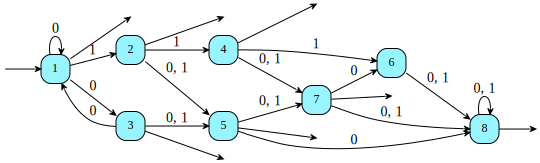

In [4]:
%%automaton a dot
digraph
{
  vcsn_context = "lal(01), b"
  // Initial states are denoted by an edge from a node whose
  // name starts with an "I".  So "0" is a initial state.
  // Weights might be specified here, e.g., [label = "<1/2>"]
  // in Q.
  I -> 1
  1 -> 1 [label = "0"]
  1 -> 2 [label = "1"]
  1 -> 3 [label = "0"]
  2 -> 4 [label = "1"]
  2 -> 5 [label = "0"]
  2 -> 5 [label = "1"]
  3 -> 1 [label = "0"]
  3 -> 5 [label = "0,1"]
  4 -> 6 [label = "1"]
  4 -> 7 [label = "0,1"]
  5 -> 7 [label = "0,1"]
  5 -> 8 [label = "0"]
  6 -> 8 [label = "0,1"]
  7 -> 6 [label = "0"]
  7 -> 8 [label = "0,1"]
  8 -> 8 [label = "0,1"]
    
  // Final states are denoted by an edge to a node whose name starts with "F".
  1 -> F
  2 -> F
  3 -> F
  4 -> F
  5 -> F
  //6 -> F
  7 -> F
  8 -> F  
}

In [5]:
def universality_check(a):
    # remove useless state -> det. -> min. -> add useless transitions -> complement
    complement = a.trim().determinize().minimize().complete().complement()
    # is_useless -> automaton accepts no words
    return (complement, complement.is_useless())

In [6]:
tdmcc, is_universal = universality_check(a)
is_universal

True

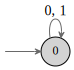

In [7]:
tdmcc

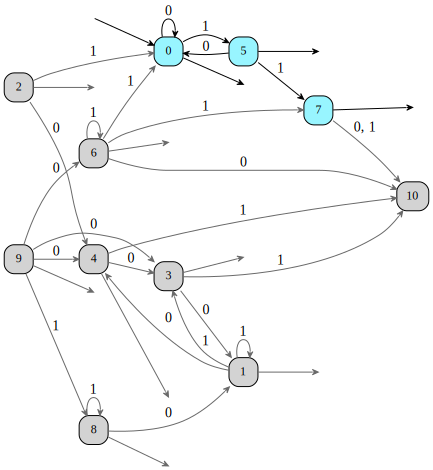

In [8]:
%%automaton a_9 dot
digraph
{
vcsn_context = "lal(01), b"

// Initial state
I -> 0

// Transitions
0 -> 0 [label = "0"]
0 -> 5 [label = "1"]
1 -> 4 [label = "0"]
1 -> 1 [label = "1"]
1 -> 3 [label = "1"]
2 -> 4 [label = "0"]
2 -> 0 [label = "1"]
3 -> 1 [label = "0"]
3 -> 10 [label = "1"]
4 -> 3 [label = "0"]
4 -> 10 [label = "1"]
5 -> 0 [label = "0"]
5 -> 7 [label = "1"]
6 -> 6 [label = "1"]
6 -> 0 [label = "1"]
6 -> 7 [label = "1"]
6 -> 10 [label = "0"]
7 -> 10 [label = "0"]
7 -> 10 [label = "1"]
8 -> 1 [label = "0"]
8 -> 8 [label = "1"]
9 -> 4 [label = "0"]
9 -> 3 [label = "0"]
9 -> 6 [label = "0"]
9 -> 8 [label = "1"]
// Accepting states
9 -> F
3 -> F
0 -> F
6 -> F
1 -> F
5 -> F
4 -> F
7 -> F
2 -> F
8 -> F
}

In [9]:
tdmcc, is_universal = universality_check(a_9)
is_universal

False

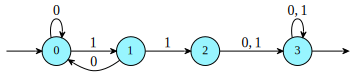

In [10]:
tdmcc

In [11]:
a_9.evaluate('0')

1

In [12]:
tdmcc.complement().evaluate('0')

1

In [23]:
import sys
import time
def execvcsn(autstring):
    """
    :param autstring: VCSN (string) automaton representation
    :return: Tuple: (is_universal, elapsed_time) where elapsed time is in ms.
    """
    try:
        import vcsn
    except ImportError:
        print("VCSN not installed, ABORT.", file=sys.stderr)
        sys.exit(1)
    aut = vcsn.automaton(autstring, strip=False)

    def universality_check(a):
        # remove useless state -> det. -> min. -> add useless transitions -> complement
        complement = a.trim().determinize().minimize().complete().complement()
        # is_useless -> automaton accepts no words
        return complement, complement.is_useless()

    started = time.time()
    _, is_universal = universality_check(aut)
    delta = time.time() - started
    return is_universal, round(delta * 1000, 2)

In [24]:
hardcoded_autstring = """
vcsn_context = "lal(01), b"
// Initial state
$ -> 0

// Transitions
0 -> 6 0
0 -> 0 0
0 -> 10 1
1 -> 10 0
1 -> 10 1
2 -> 5 0
2 -> 2 0
2 -> 1 1
3 -> 9 0
3 -> 9 1
3 -> 7 1
4 -> 4 0
4 -> 6 0
4 -> 1 1
5 -> 4 1
5 -> 10 0
6 -> 0 1
6 -> 3 1
6 -> 10 0
7 -> 9 1
7 -> 7 1
7 -> 10 0
8 -> 5 0
8 -> 4 1
9 -> 9 0
9 -> 0 0
9 -> 10 1
// Accepting states
3 -> $
7 -> $
6 -> $
8 -> $
2 -> $
1 -> $
5 -> $
9 -> $
4 -> $
0 -> $

"""

In [25]:
execvcsn(autstring)

(False, 0.71)

In [26]:
import json
import glob
import os
dataset = 'tv05-dataset0'
# /data contains tv05-dataset0
autfiles = glob.glob('/data/'+ dataset  + '/*.vcsn')
results = {}
for autfile in autfiles:
    with open(autfile) as f:
        autstring = "".join(f.readlines())
    is_universal, elapsed = execvcsn(autstring)
    results[os.path.splitext(os.path.basename(autfile))[0]] = [is_universal, elapsed]
with open('/data/evaluation/vcsn__univcheck__' + dataset + '__results.json', 'w') as f:
    json.dump(results, f, indent=2)
results

{'aut0': [True, 0.25],
 'aut1': [False, 0.47],
 'aut10': [False, 0.29],
 'aut11': [False, 0.08],
 'aut12': [False, 0.19],
 'aut13': [False, 0.43],
 'aut14': [False, 0.09],
 'aut15': [False, 0.44],
 'aut16': [False, 0.71],
 'aut17': [False, 0.07],
 'aut18': [False, 0.23],
 'aut19': [False, 0.2],
 'aut2': [False, 0.48],
 'aut20': [False, 0.12],
 'aut21': [False, 0.35],
 'aut22': [False, 0.18],
 'aut23': [False, 0.31],
 'aut24': [False, 0.45],
 'aut25': [False, 0.2],
 'aut26': [True, 0.07],
 'aut27': [False, 0.1],
 'aut28': [False, 0.06],
 'aut29': [False, 0.06],
 'aut3': [False, 0.14],
 'aut30': [False, 0.15],
 'aut31': [False, 0.18],
 'aut32': [False, 0.19],
 'aut33': [False, 0.07],
 'aut34': [False, 0.22],
 'aut35': [False, 0.74],
 'aut36': [False, 0.19],
 'aut37': [False, 0.14],
 'aut38': [False, 0.07],
 'aut39': [False, 0.11],
 'aut4': [False, 0.79],
 'aut40': [False, 0.42],
 'aut41': [False, 0.12],
 'aut42': [False, 0.35],
 'aut43': [False, 0.36],
 'aut44': [False, 0.34],
 'aut45': 

In [35]:
import glob

with open("/data/tv05-dataset0/aut0.vcsn") as f:
    autstring = f.read()

In [36]:
execvcsn(autstring)

(True, 17.17)

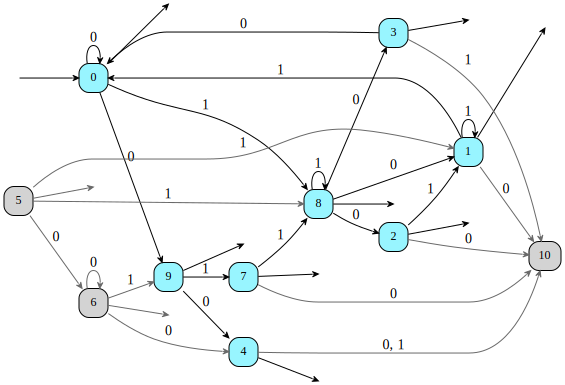

In [37]:
aut = vcsn.automaton(autstring, strip=False)
aut

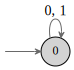

In [38]:
complement = aut.trim().determinize().minimize().complete().complement()
complement

In [34]:
complement.lightest()

0011

In [21]:
complement.evaluate("0011")

1